In [48]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import AzureChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [49]:
load_dotenv()

True

In [50]:
model= AzureChatOpenAI(azure_deployment=os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME"),
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"),
    model=os.getenv("AZURE_OPENAI_MODEL_NAME"),
    api_version=os.getenv("AZURE_OPENAI_API_VERSION"),
    max_tokens=1000,
)

In [51]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluate: int

In [52]:
def create_outline(state: BlogState) -> BlogState:
    title= state['title']
    prompt = f'Generate an outline for a blog on the topic - {title}'
    response=model.invoke(prompt)
    state['outline'] = response.content
    return state

In [53]:
def create_blog(state: BlogState) -> BlogState:
    outline = state['outline']
    title= state['title']
    prompt = f'Write a detailed blog on the title -{title} using the following outline \n- {outline}'
    response=model.invoke(prompt)
    state['content'] = response.content
    return state

In [54]:
def evaluate(state: BlogState) -> BlogState:
    content = state['content']
    prompt= f' Evaluate the following blog content and rate it between 1 and 10 in integer only:\n\n{content}'
    response = model.invoke(prompt)
    state['evaluate'] = response.content
    return state

In [55]:
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate', evaluate)  # Placeholder for evaluation step

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate')
graph.add_edge('create_blog', END)

workflow = graph.compile()


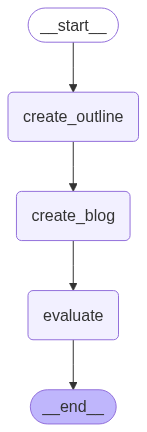

In [56]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [57]:
input_state= {'title': 'Rise of AI in India'}
final_state= workflow.invoke(input=input_state)
print(final_state)

{'title': 'Rise of AI in India', 'outline': 'Certainly! Here’s a detailed outline for a blog on **“Rise of AI in India”**:\n\n---\n\n## Introduction\n- Brief overview of AI and its global significance.\n- Setting the context: Why is AI especially relevant for India right now?\n\n## Historical Background\n- Early adoption of AI research in premier Indian institutes.\n- Milestones in Indian AI journey (including governmental and private initiatives).\n\n## Key Drivers of AI Growth in India\n- Digital India movement.\n- Expanding internet and smartphone penetration.\n- Government policies and investments in AI (e.g., NITI Aayog, National AI Strategy).\n- Booming startup ecosystem.\n\n## Major Sectors Transformed by AI\n- **Healthcare**: Diagnostics, telemedicine, predictive analytics.\n- **Agriculture**: Crop monitoring, yield prediction, supply chain optimization.\n- **Education**: Personalized learning, vernacular AI content.\n- **Finance & Banking**: Fraud detection, automated lending,

In [58]:
print(final_state['outline'])

Certainly! Here’s a detailed outline for a blog on **“Rise of AI in India”**:

---

## Introduction
- Brief overview of AI and its global significance.
- Setting the context: Why is AI especially relevant for India right now?

## Historical Background
- Early adoption of AI research in premier Indian institutes.
- Milestones in Indian AI journey (including governmental and private initiatives).

## Key Drivers of AI Growth in India
- Digital India movement.
- Expanding internet and smartphone penetration.
- Government policies and investments in AI (e.g., NITI Aayog, National AI Strategy).
- Booming startup ecosystem.

## Major Sectors Transformed by AI
- **Healthcare**: Diagnostics, telemedicine, predictive analytics.
- **Agriculture**: Crop monitoring, yield prediction, supply chain optimization.
- **Education**: Personalized learning, vernacular AI content.
- **Finance & Banking**: Fraud detection, automated lending, customer service.
- **Retail & E-commerce**: Chatbots, personalize

In [59]:
print(final_state['content'])

# Rise of AI in India: Charting the Nation’s Digital Destiny

## Introduction

Artificial Intelligence (AI)—the simulation of human intelligence by machines—is transforming industries, economies, and societies across the globe. With capabilities like learning, reasoning, problem-solving, and language understanding, AI is driving the Fourth Industrial Revolution. For India, with its vast population, diverse economy, and ambitious digital agenda, AI holds particular promise. As the nation surges into a tech-enabled future, AI’s relevance is more profound than ever, making it a crucial tool for solving India’s unique challenges and harnessing its demographic dividend.

---

## Historical Background

### Early Adoption of AI Research

India’s tryst with AI began in the premier corridors of research about four decades ago. Institutes like the Indian Institutes of Technology (IITs), Indian Statistical Institute, and Indian Institute of Science (IISc) took early strides in computational resea

In [60]:
print(final_state['evaluate'])

8

**Reasoning:**  
The blog is comprehensive, well-structured, and covers multiple aspects of AI in India: historical background, key growth drivers, sectoral impact, and leading companies/initiatives. The writing is clear, factual, and shows an understanding of the landscape. The content is data-rich and includes specific examples (e.g., Niramai, number of startups), government policies, and investments.

**What keeps it from a 9 or 10:**
- The concluding section appears cut off (ends abruptly at "Academic"), missing closure and a call to action or forecast that would give the post more impact.
- Visuals, infographics, or quotes (if included) could increase engagement.
- While informative, it could offer a bit more critical analysis (e.g., discussing ethical challenges, skill gaps, or risks of AI adoption in India).

Overall: A strong, informative blog draft with room for slight improvement mainly in closure and deeper insights.
